In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
breast = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast.data, breast.target, test_size=0.2, random_state=11)

In [23]:
breast.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [3]:
len(y_train)

455

In [4]:
train_Gini, test_Gini = [], []

for i in range(1, 16):
    dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dt_gini.fit(X_train, y_train)
    
    train_acc = dt_gini.score(X_train, y_train)
    train_Gini.append(train_acc)
    test_acc = dt_gini.score(X_test, y_test)
    test_Gini.append(test_acc)
    

<function matplotlib.pyplot.show(close=None, block=None)>

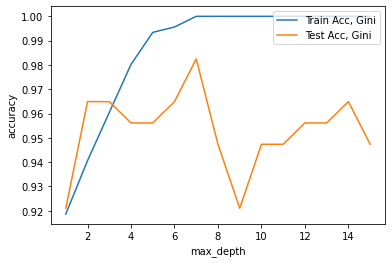

In [5]:
iter_ranges = np.linspace(1, 15, num=15)
plt.plot(iter_ranges, train_Gini, label="Train Acc, Gini")
plt.plot(iter_ranges, test_Gini, label="Test Acc, Gini")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.show

In [6]:
np.argmax(test_Gini)

6

In [7]:
train_Entropy, test_Entropy = [], []

for i in range(1, 16):
    dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt_entropy.fit(X_train, y_train)
    
    train_acc = dt_entropy.score(X_train, y_train)
    train_Entropy.append(train_acc)
    test_acc = dt_entropy.score(X_test, y_test)
    test_Entropy.append(test_acc)

<function matplotlib.pyplot.show(close=None, block=None)>

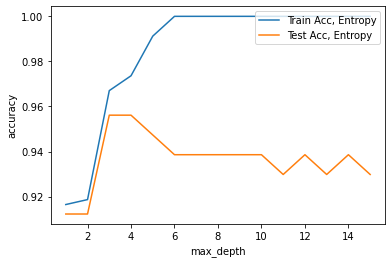

In [8]:
iter_ranges = np.linspace(1, 15, num=15)
plt.plot(iter_ranges, train_Entropy, label="Train Acc, Entropy")
plt.plot(iter_ranges, test_Entropy, label="Test Acc, Entropy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc="upper right")
plt.show

In [9]:
np.argmax(test_Entropy)

2

In [10]:
test_Entropy

[0.9122807017543859,
 0.9122807017543859,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9298245614035088]

In [11]:
from sklearn.tree import plot_tree

In [12]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(643.8461538461538, 475.65000000000003, 'worst perimeter <= 116.05\nentropy = 0.96\nsamples = 455\nvalue = [174, 281]'),
 Text(343.38461538461536, 339.75, 'worst perimeter <= 101.65\nentropy = 0.505\nsamples = 313\nvalue = [35, 278]'),
 Text(171.69230769230768, 203.85000000000002, 'worst smoothness <= 0.191\nentropy = 0.166\nsamples = 244\nvalue = [6, 238]'),
 Text(85.84615384615384, 67.94999999999999, 'entropy = 0.097\nsamples = 240\nvalue = [3, 237]'),
 Text(257.53846153846155, 67.94999999999999, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(515.0769230769231, 203.85000000000002, 'worst smoothness <= 0.14\nentropy = 0.982\nsamples = 69\nvalue = [29, 40]'),
 Text(429.23076923076917, 67.94999999999999, 'entropy = 0.705\nsamples = 47\nvalue = [9, 38]'),
 Text(600.9230769230769, 67.94999999999999, 'entropy = 0.439\nsamples = 22\nvalue = [20, 2]'),
 Text(944.3076923076923, 339.75, 'worst concavity <= 0.191\nentropy = 0.148\nsamples = 142\nvalue = [139, 3]'),
 Text(858.461538

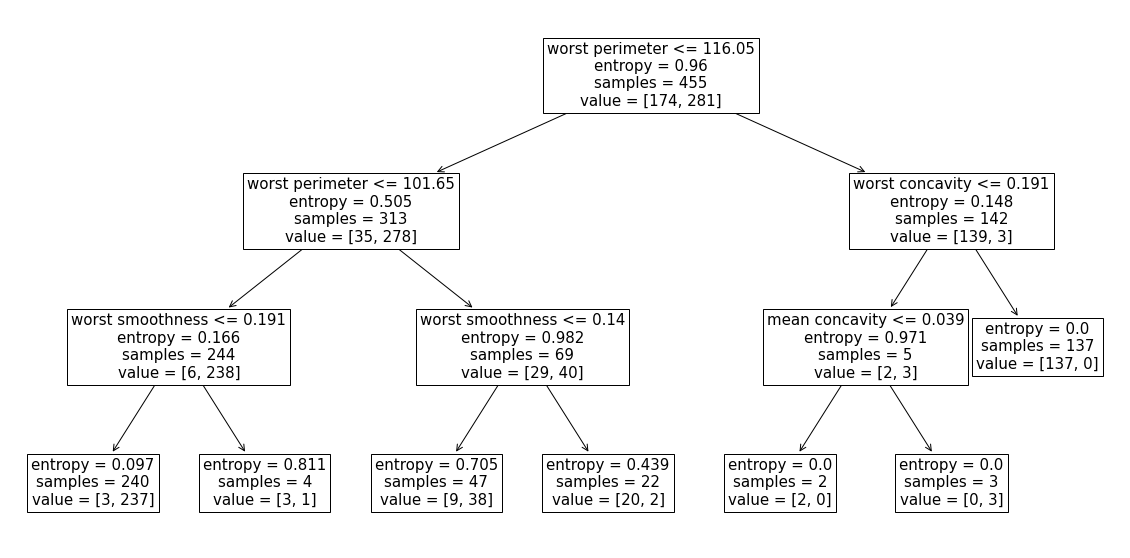

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, feature_names=breast.feature_names, fontsize=15)

In [14]:
import pandas as pd
pd.DataFrame(X_train, columns=breast.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
1,12.31,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.022720,0.1720,0.05914,...,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.20310,0.29230,0.06835,0.2884,0.07220
3,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
4,11.04,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.14820,0.10670,0.07431,0.2998,0.07881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
451,10.71,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.25500,0.25340,0.08600,0.2605,0.08701
452,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.46340,0.20480,0.3679,0.09870
453,15.37,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.28460,0.14760,0.2556,0.06828


In [15]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

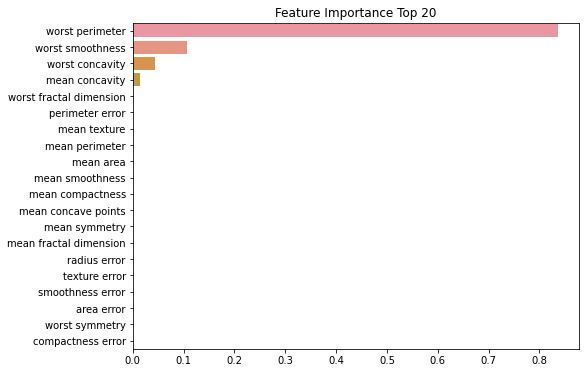

In [16]:
import seaborn as sns

ftr_importances_values = dt_entropy.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=breast.feature_names)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# Pair session 200217
- confusion matrix 만들어 보기

In [25]:
y_pred = dt_entropy.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)

In [28]:
tn, fp, fn, tp = cfm.ravel()

In [29]:
print(tn, fp, fn, tp)

33 5 0 76


In [32]:
# precision
precision = tp / (tp+fp)
precision

0.9382716049382716

In [33]:
# recall
recall = tp / (tp+fn)
recall

1.0

In [35]:
# f1 score
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9681528662420382